In [149]:
%matplotlib inline
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
import scipy.stats as stats

data = yf.download("MSFT AAPL GOOG NVDA", start="2017-01-01", end="2022-04-30",
                   group_by="ticker")
msft = pd.DataFrame(data['MSFT'])
apple = pd.DataFrame(data['AAPL'])
google = pd.DataFrame(data['GOOG'])
nvda = pd.DataFrame(data['NVDA'])

[*********************100%***********************]  4 of 4 completed


In [150]:
# adding ticker column
msft['Ticker'] = 'MSFT'
apple['Ticker'] = 'AAPL'
google['Ticker'] = 'GOOG'
nvda['Ticker'] = 'NVDA'
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.807835,20694100,MSFT
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.549179,21340000,MSFT
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.549179,24876000,MSFT
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.047997,19922900,MSFT
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.863247,20382700,MSFT


In [151]:
# function to reorder columns
def columns(df):
    df = df[['Ticker','Open','High','Low','Close','Adj Close','Volume']]
    return df

In [152]:
# function to calculate difference between high and low price
def highlow(df):
    df = df.assign(Difference = lambda x: x['High'] - x['Low'])
    return df

In [153]:
# function to calculate profit
def profit(df):
    df = df.assign(Profit = lambda x: (x['Open'] + x['Close'])/2 * x['Volume'])
    return df

In [154]:
# function to calculate profit percent change 
def pctchg(df):
    df['Profit Percent Change'] = df['Profit'].pct_change()
    return df

In [155]:
# funtion for cleaning up and formatting data
def cleandat(df):
    df = df.round(2)
    df["Profit Percent Change"] = df["Profit Percent Change"].map('{:.2f}'.format)
    df["Profit"] = df["Profit"].map("{:.2f}".format)
    df["Difference"] = df["Difference"].map("{:.2f}".format)
    df["High"] = df["High"].map("{:.2f}".format)
    df["Low"] = df["Low"].map("{:.2f}".format)
    df["Open"] = df["Open"].map("{:.2f}".format)
    df["Close"] = df["Close"].map("{:.2f}".format)
    df["Adj Close"] = df["Adj Close"].map("{:.2f}".format)
    df["Volume"] = df["Volume"].map("{:.0f}".format)
    return df

In [156]:
# function to convert dtypes to string and floats for data manipulation
def astypes(df):
    df = df.astype({'Ticker':'str',
                    'Open': 'float',
                    'High':'float',
                    'Low':'float',
                    'Close':'float',
                    'Adj Close':'float',
                    'Volume':'float',
                    'Profit':'float',
                    'Profit Percent Change':'float',
                    'Difference':'float'})
    return df

In [157]:
# function to add year, month, and day to their own columns by slicing index
def date(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day

    return df

In [158]:
# create list of dfs
dfs = [msft, apple, google, nvda]
# applying all functions in a for loop
for i,df in enumerate(dfs):
    df = columns(df)
    #df = repindex(df)
    #df = date(df)
    df = highlow(df)
    df = profit(df)
    df = pctchg(df)
    df = cleandat(df)
    df = astypes(df)
    df = date(df)
    display(df[:5])
    dfs[i]=df

,Ticker,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change,Year,Month,Day
Date,,,,,,,,,,,,,
2017-01-03,MSFT,62.79,62.84,62.13,62.58,57.81,20694100.0,0.71,1.297210e+09,NaN,2017,1,3
2017-01-04,MSFT,62.48,62.75,62.12,62.30,57.55,21340000.0,0.63,1.331403e+09,0.03,2017,1,4
2017-01-05,MSFT,62.19,62.66,62.03,62.30,57.55,24876000.0,0.63,1.548407e+09,0.16,2017,1,5
2017-01-06,MSFT,62.30,63.15,62.04,62.84,58.05,19922900.0,1.11,1.246576e+09,-0.19,2017,1,6
2017-01-09,MSFT,62.76,63.08,62.54,62.64,57.86,20382700.0,0.54,1.277995e+09,0.03,2017,1,9


,Ticker,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change,Year,Month,Day
Date,,,,,,,,,,,,,
2017-01-03,AAPL,28.95,29.08,28.69,29.04,27.22,115127600.0,0.39,3.337981e+09,NaN,2017,1,3
2017-01-04,AAPL,28.96,29.13,28.94,29.00,27.19,84472400.0,0.19,2.448327e+09,-0.27,2017,1,4
2017-01-05,AAPL,28.98,29.22,28.95,29.15,27.33,88774400.0,0.26,2.580339e+09,0.05,2017,1,5
2017-01-06,AAPL,29.19,29.54,29.12,29.48,27.63,127007600.0,0.42,3.725927e+09,0.44,2017,1,6
2017-01-09,AAPL,29.49,29.86,29.49,29.75,27.89,134247600.0,0.37,3.976078e+09,0.07,2017,1,9


,Ticker,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change,Year,Month,Day
Date,,,,,,,,,,,,,
2017-01-03,GOOG,38.94,39.48,38.79,39.31,39.31,33146000.0,0.69,1.296796e+09,NaN,2017,1,3
2017-01-04,GOOG,39.42,39.57,39.16,39.35,39.35,21460000.0,0.41,8.451270e+08,-0.35,2017,1,4
2017-01-05,GOOG,39.30,39.72,39.25,39.70,39.70,26704000.0,0.47,1.054875e+09,0.25,2017,1,5
2017-01-06,GOOG,39.76,40.40,39.61,40.31,40.31,32804000.0,0.78,1.313316e+09,0.24,2017,1,6
2017-01-09,GOOG,40.32,40.50,40.14,40.33,40.33,25492000.0,0.36,1.027997e+09,-0.22,2017,1,9


,Ticker,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change,Year,Month,Day
Date,,,,,,,,,,,,,
2017-01-03,NVDA,26.10,26.59,24.84,25.50,25.15,150199600.0,1.75,3.875337e+09,NaN,2017,1,3
2017-01-04,NVDA,25.85,26.38,25.38,26.10,25.74,119922000.0,0.99,3.114824e+09,-0.20,2017,1,4
2017-01-05,NVDA,26.13,26.45,25.26,25.43,25.09,98429600.0,1.19,2.537884e+09,-0.19,2017,1,5
2017-01-06,NVDA,25.71,26.06,25.30,25.77,25.42,82285600.0,0.76,2.118340e+09,-0.17,2017,1,6
2017-01-09,NVDA,25.88,27.00,25.88,26.82,26.45,91624800.0,1.12,2.414084e+09,0.14,2017,1,9


In [159]:
# assigning dfs from list to variables
msft = dfs[0]
aapl = dfs[1]
goog = dfs[2]
nvda = dfs[3]
# merging all dfs so they stack on top of each other
stack = pd.concat([msft,aapl,goog,nvda], axis=0)

In [160]:
yr = stack[stack['Year'] == 2017]
month = yr[yr['Month'] == 1]
day = month[month['Day'] == 3]


op1 = day[day['Ticker'] == 'MSFT']['Open']
op2 = day[day['Ticker'] == 'AAPL']['Open']
op3 = day[day['Ticker'] == 'GOOG']['Open']
op4 = day[day['Ticker'] == 'NVDA']['Open']



***High Minus Low (HML) is a value premium; it represents the spread in returns between companies with a high book-to-market value ratio and companies with a low book-to-market value ratio***


Text(0.5, 1.0, 'NVDA')

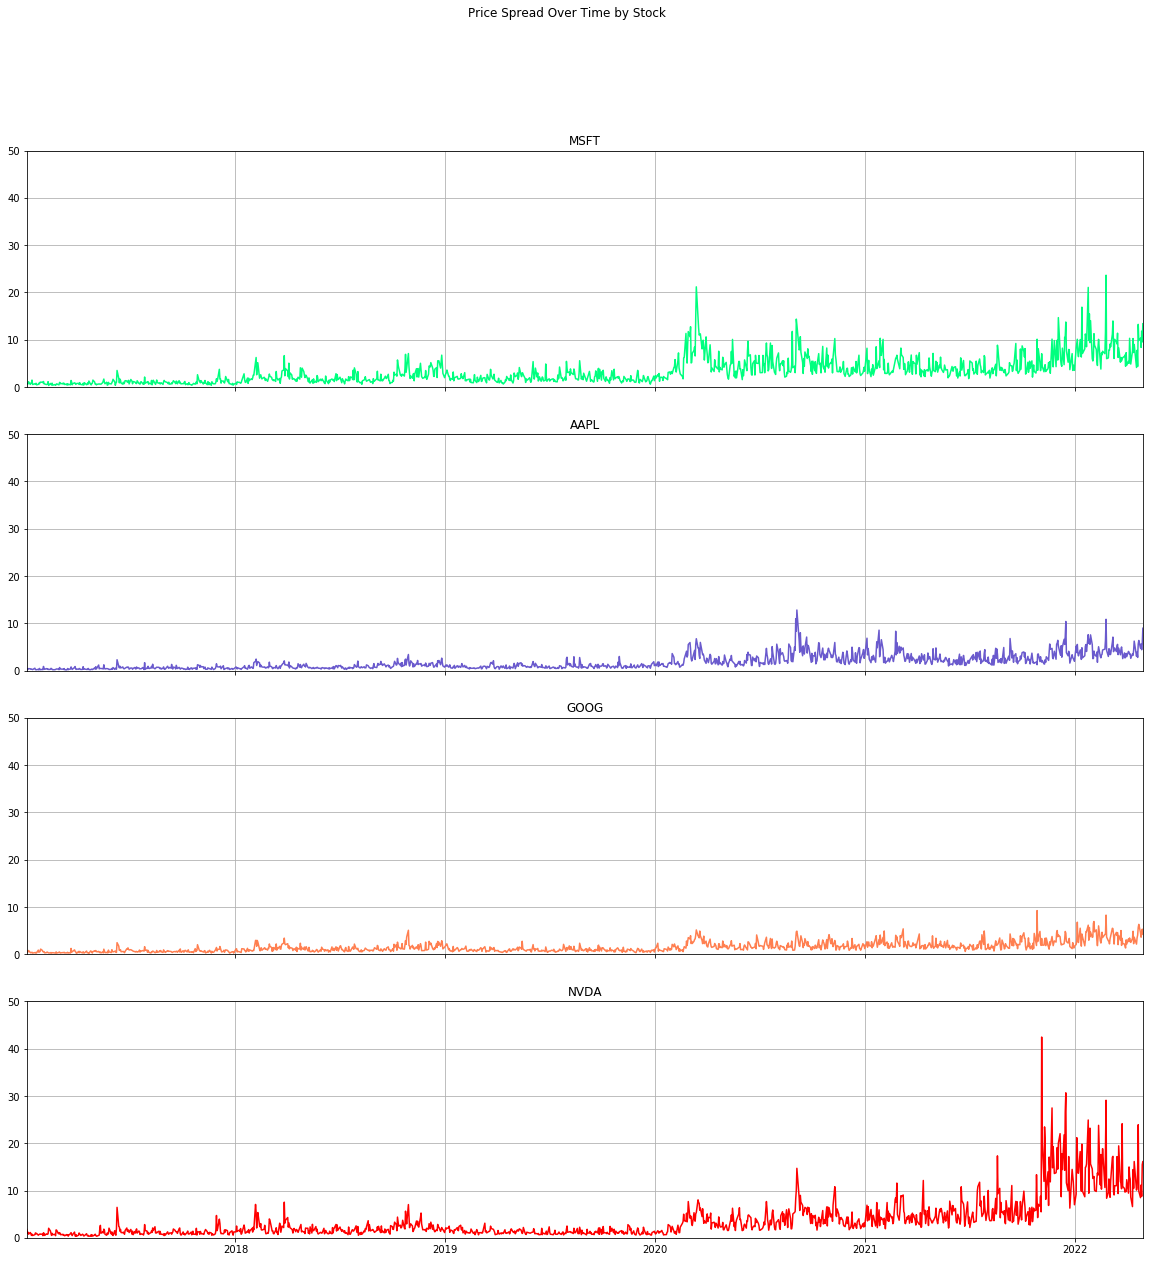

In [187]:
# plot for difference in high and low price vs time (Price spread)
print('***High Minus Low (HML) is a value premium; it represents the spread '
      'in returns between companies with a high book-to-market value '
      'ratio and companies with a low book-to-market value ratio***') # From https://www.investopedia.com/terms/h/high_minus_low.asp#:~:text=High%20Minus%20Low%20(HML)%20is%20a%20value%20premium%3B%20it,be%20found%20by%20linear%20regression.
m = msft['Difference']
x = msft.index
a = aapl['Difference']
g = goog['Difference']
n = nvda['Difference']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20),sharex=True)
fig.suptitle('Price Spread Over Time by Stock')
ax1.plot(x, m, color='springgreen')
ax1.grid()
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([0,50])
ax1.set_title('MSFT')
ax2.plot(x, a, color='slateblue')
ax2.grid()
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,50])
ax2.set_title('AAPL')
ax3.plot(x,g, color='coral')
ax3.grid()
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([0,50])
ax3.set_title('GOOG')
ax4.plot(x,n, color='red')
ax4.grid()
ax4.set_xlim([xmin,xmax])
ax4.set_ylim([0,50])
ax4.set_title('NVDA')

***Adjusted closing price provides a more accurate snapshot of a stock's value than the closing price because it accounts for factors such as dividend payouts, stock splits, and issuance of new shares.***


Text(0.5, 1.0, 'NVDA')

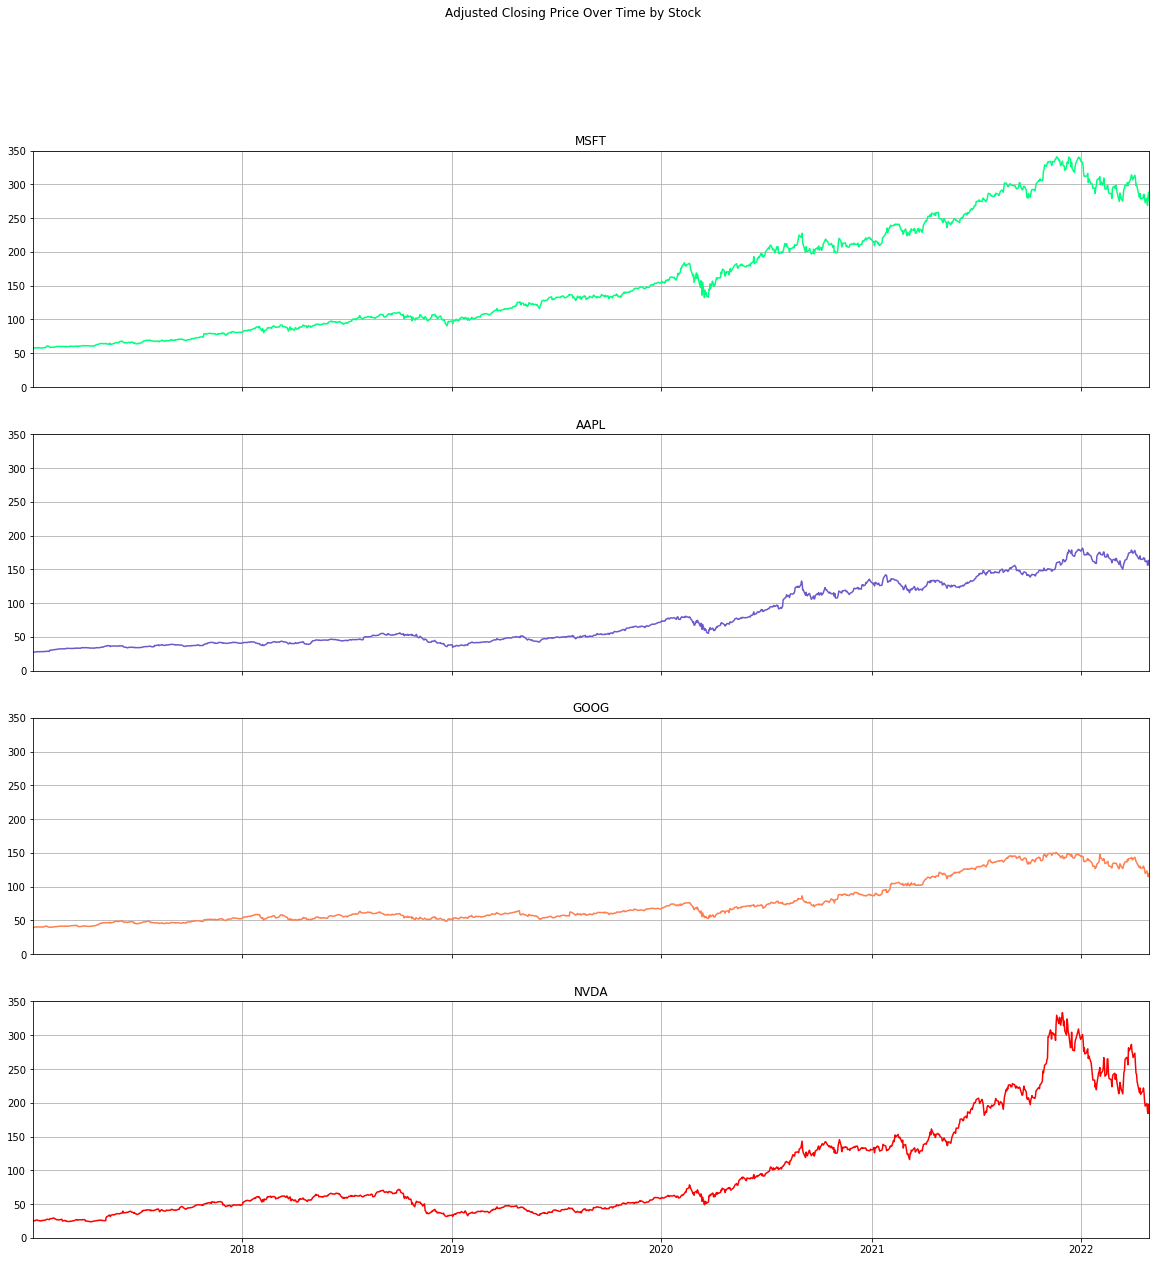

In [181]:
# splitting plots into 4 separate ax for better visibility of trends
print("***Adjusted closing price provides a more accurate snapshot of a stock's value than the "
"closing price because it accounts for factors such as dividend payouts, stock splits, " 
"and issuance of new shares.***")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20),sharex=True)
fig.suptitle('Adjusted Closing Price Over Time by Stock')
y1 = msft['Adj Close']
x1 = msft.index
y2 = aapl['Adj Close']
y3 = goog['Adj Close']
y4 = nvda['Adj Close']
ax1.plot(x1, y1, color='springgreen')
ax1.grid()
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([0,350])
ax1.set_title('MSFT')
ax2.plot(x1, y2, color='slateblue')
ax2.grid()
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,350])
ax2.set_title('AAPL')
ax3.plot(x1,y3, color='coral')
ax3.grid()
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([0,350])
ax3.set_title('GOOG')
ax4.plot(x1,y4, color='red')
ax4.grid()
ax4.set_xlim([xmin,xmax])
ax4.set_ylim([0,350])
ax4.set_title('NVDA')

Question 1/Question 2: Which stocks are trending upward? Which stocks are trending downward?

Based on the visual above, up until Q4 of 2021, all four stocks experienced a positive overall trend upwards. However, in Q1 of 2022, all four have started to trend downward, with NVDIA experiencing the largest shift. Apple and Google seem to be the least effected by the negative trend, which makes sense since their Price Spread visuals show they also have the least volatility. 

<BarContainer object of 4 artists>

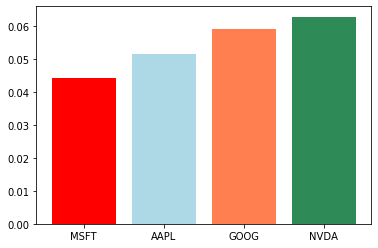

In [163]:
x = ['MSFT','AAPL','GOOG','NVDA']
pc1 = msft['Profit Percent Change'].mean()
pc2 = aapl['Profit Percent Change'].mean()
pc3 = goog['Profit Percent Change'].mean()
pc4 = nvda['Profit Percent Change'].mean()
y = [pc1,pc2,pc3,pc4]
plt.bar(x,y, color=['red','lightblue', 'coral' , 'seagreen'])

Text(0.5, 1.0, 'NVDA')

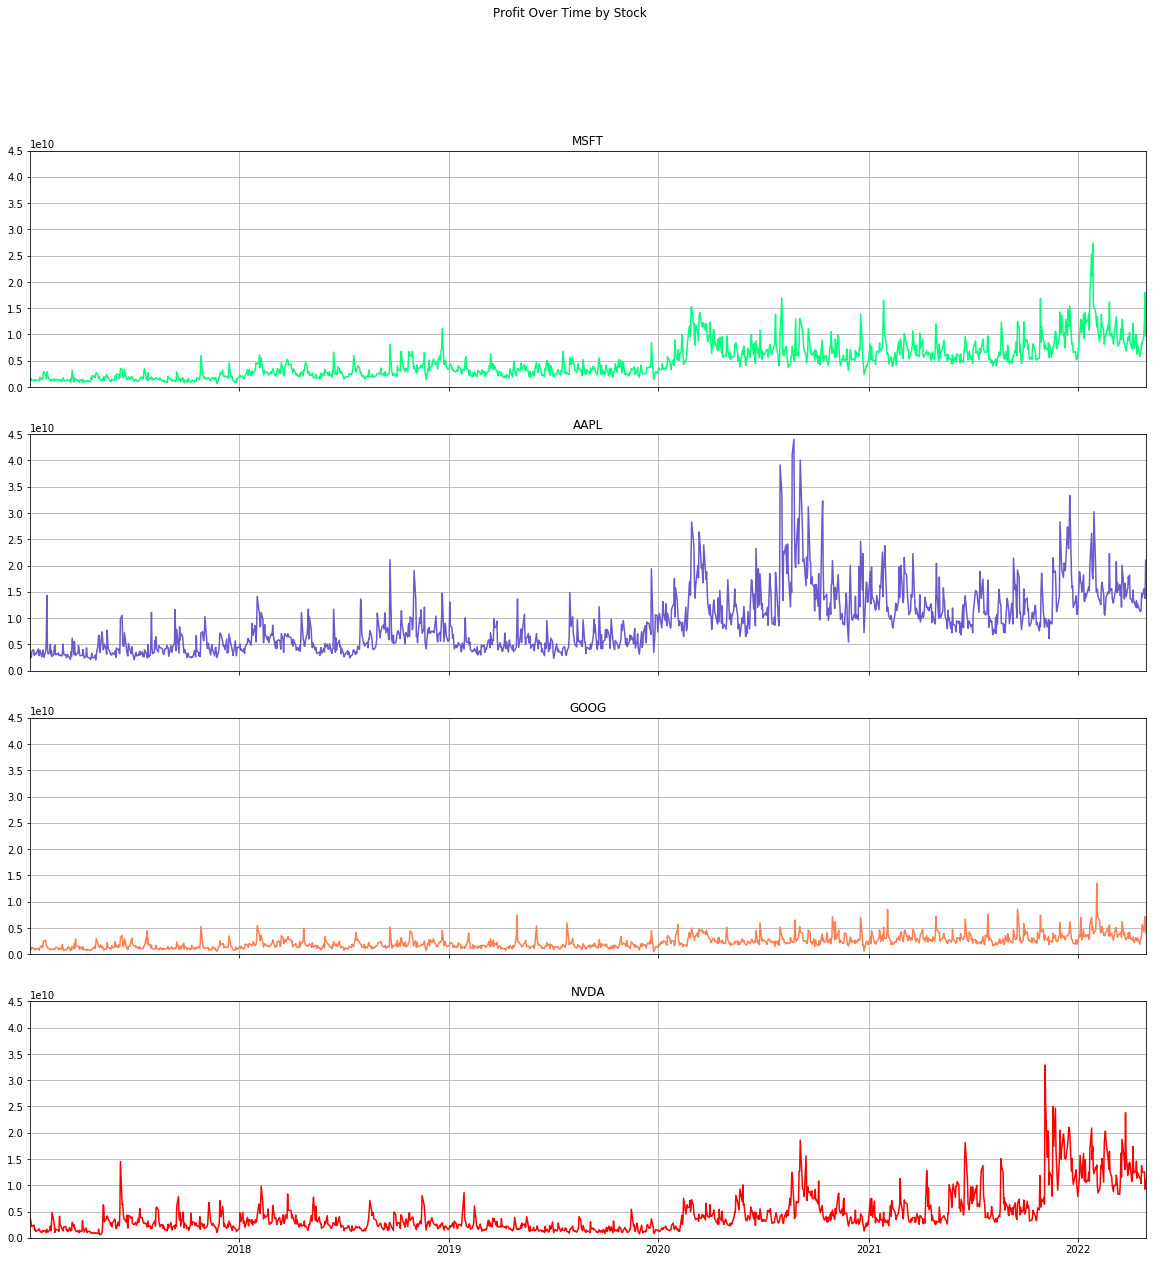

In [164]:
# split plot for profits over time
x2 = msft.index
p1 = msft['Profit']
p2 = aapl['Profit']
p3 = goog['Profit']
p4 = nvda['Profit']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20),sharex=True)
fig.suptitle('Profit Over Time by Stock')
ax1.plot(x2, p1, color='springgreen')
ax1.grid()
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([0,45000000000])
ax1.set_title('MSFT')
ax2.plot(x2, p2, color='slateblue')
ax2.grid()
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,45000000000])
ax2.set_title('AAPL')
ax3.plot(x2,p3, color='coral')
ax3.grid()
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([0,45000000000])
ax3.set_title('GOOG')
ax4.plot(x2,p4, color='red')
ax4.grid()
ax4.set_xlim([xmin,xmax])
ax4.set_ylim([0,45000000000])
ax4.set_title('NVDA')



Question 2: What reccomendations would you make to your client?

Based purely on our Profit Over Time visual, I would reccomend investing in AAPL due to their upward trend in profits in the last few quarters, as well as the stocks resilience. Based on our Profit Percent Change bar chart, in addition to AAPL, I would reccomend investing in NVDA since they have the highest average percent profit change with a positive 6 percent over the last 5 years.

HYPOTHESIS: AAPL stock is the most profitable over the last 5 years and thus, has the most potential to maximize profits.
NULL HYPOTHESIS: AAPL stock is not the most profitable, and some other stock has the most potential to maximize profits.
Ticker
AAPL    9.131305e+09
GOOG    2.282990e+09
MSFT    4.829010e+09
NVDA    4.452933e+09
Name: Profit, dtype: float64
F_onewayResult(statistic=715.9653859070331, pvalue=0.0)
Pvalue is less than our 0.05 level of significance, so we reject the Null Hypothesis and reccomend investing in AAPL.


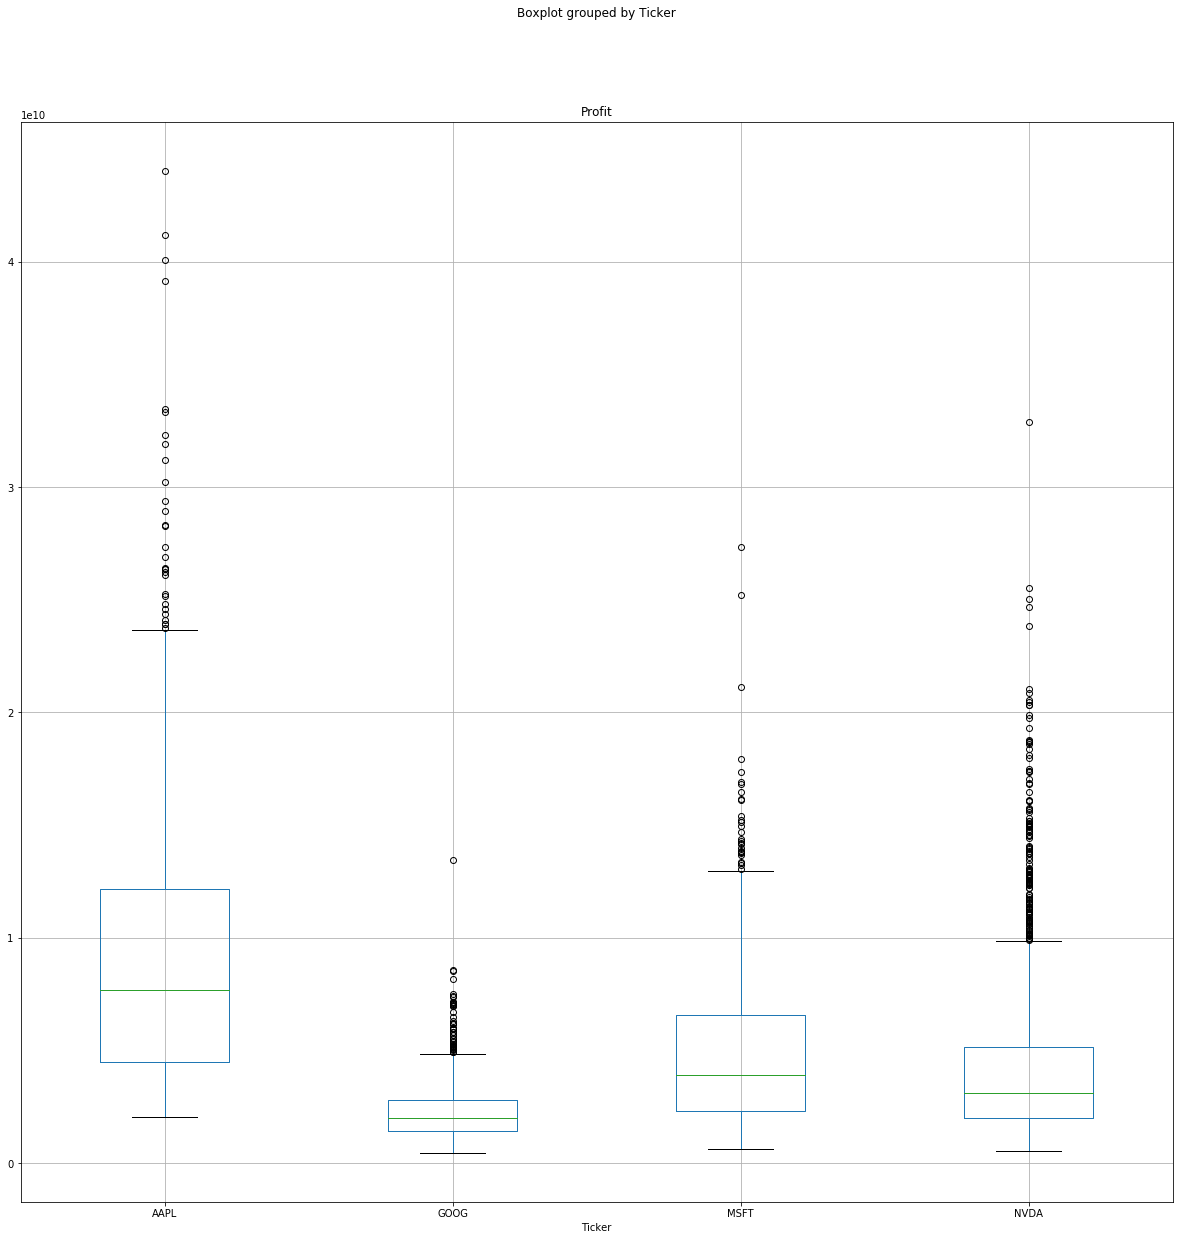

In [165]:
print('HYPOTHESIS: AAPL stock is the most profitable over the last 5 years and thus, ' 
'has the most potential to maximize profits.')
print('NULL HYPOTHESIS: AAPL stock is not the most profitable, '
'and some other stock has the most potential to maximize profits.')

stack.boxplot('Profit', by='Ticker', figsize=(20, 20))
group0 = stack[stack['Ticker'] == 'MSFT']['Profit']
group1 = stack[stack['Ticker'] == 'AAPL']['Profit']
group2 = stack[stack['Ticker'] == 'GOOG']['Profit']
group3 = stack[stack['Ticker'] == 'NVDA']['Profit']
print(stack.groupby(['Ticker'])['Profit'].mean())
print(stats.f_oneway(group0, group1, group2, group3))
print('Pvalue is less than our 0.05 level of significance, '
      'so we reject the Null Hypothesis and reccomend investing in AAPL.')

Question 3: Which stock has the most potential to maximize profits?

Based on our ANOA test, since our pvalue was less than 0.05, we reject the Null Hypothesis and conclude that AAPL has the most potential to maximize profits.

491450338028.31006